In [3]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [7]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [10]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [12]:
d

154

In [13]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [14]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [15]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

In [16]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: 

In [1]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

NameError: name 'X' is not defined

In [1]:
print("Exercises")

Exercises


In [2]:
print("1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?")
print("A: The main goal is to speed up training of models.\n")
print("2. What is the curse of dimensionality?")
print("A: \n")
print("3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?")
print("A: Yes, there is posibility to reverse demension reducing, but not to origin point.\n")
print("4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?")
print("A: Yes, using PCA with kernel.\n")
print("5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?")
print("A: Like 200.\n")
print("6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?")
print("A: Incremental -- when number of dims is very big, Kernel -- when dataset is non-linear\n")
print("7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?")
print("A: By checking variance ratio\n")
print("8. Does it make any sense to chain two different dimensionality reduction algorithms?")
print("A: I think no\n")

1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?
A: The main goal is to speed up training of models.

2. What is the curse of dimensionality?
A: 

3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?
A: Yes, there is posibility to reverse demension reducing, but not to origin point.

4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?
A: Yes, using PCA with kernel.

5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?
A: Like 200.

6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?
A: Incremental -- when number of dims is very big, Kernel -- when dataset is non-linear

7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?
A: By checking variance ratio

8. D

In [3]:
print("9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?")

9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:70000], y[:60000], y[60000:70000]

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

X_red_train, X_red_test = X_reduced[:60000], X_reduced[60000:70000]

In [6]:
import time
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

start = time.time()

rfc.fit(X_train, y_train)

end = time.time()
print("Train, time:", end - start)
print("Score:", rfc.score(X_test, y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train, time: 2.7882802486419678
Score: 0.9474


In [7]:
start = time.time()

rfc.fit(X_red_train, y_train)

end = time.time()
print("Train, time:", end - start)
print("Score:", rfc.score(X_red_test, y_test))

Train, time: 6.380088806152344
Score: 0.8944


In [8]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
start = time.time()

log_clf.fit(X_train, y_train)

end = time.time()
print("Train, time:", end - start)
print("Score:", log_clf.score(X_test, y_test))

Train, time: 19.23146939277649
Score: 0.9255


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [9]:
start = time.time()

log_clf.fit(X_red_train, y_train)

end = time.time()
print("Train, time:", end - start)
print("Score:", log_clf.score(X_red_test, y_test))

Train, time: 7.088593006134033
Score: 0.92


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
print("10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.")

10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.


In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X)

In [12]:
print(X_tsne)

[[ 25.890564   10.535327 ]
 [-25.042028  -25.358168 ]
 [-20.205235   48.138878 ]
 ...
 [-41.370136   20.839563 ]
 [ 17.739485   -3.4117339]
 [ 14.231458  -45.961105 ]]


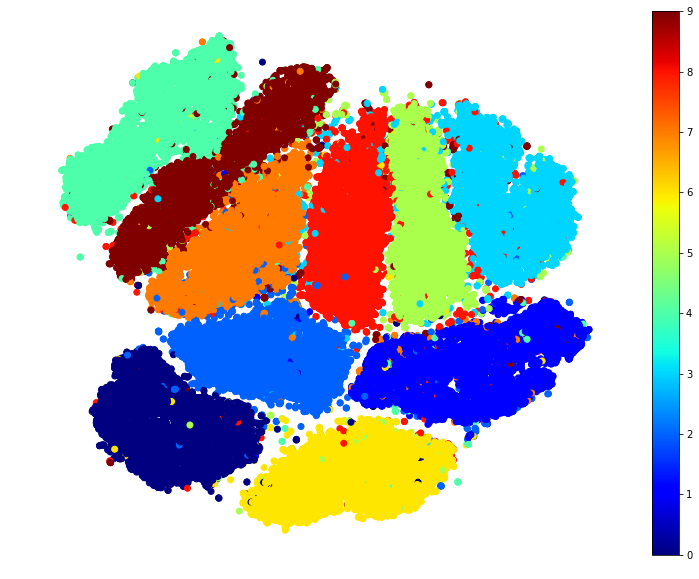

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

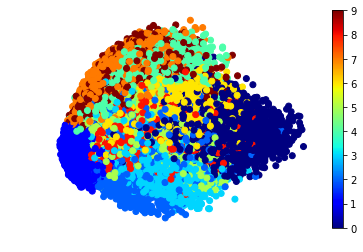

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [17]:
from sklearn.manifold import LocallyLinearEmbedding

LLE = LocallyLinearEmbedding(n_components=2)

X_LLE = LLE.fit_transform(X)

SystemError: gstrf was called with invalid arguments

In [ ]:
plt.scatter(X_LLE[:, 0], X_LLE[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [18]:
from sklearn.manifold import MDS

MDS = MDS(n_components=2)

X_MDS = MDS.fit_transform(X)

MemoryError: 

In [ ]:
plt.scatter(X_MDS[:, 0], X_MDS[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()